In [1]:
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches

%matplotlib widget
plt.style.use('presentation.mplstyle')
plate_select = ['127','129','130','1014','1023','1037','1042','52','56','839','938','1076','84','89','91']

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
analysis_folders = get_analysis_folders()


In [3]:
%load_ext autoreload
%autoreload 2
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders)
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders)


In [4]:
import matplotlib as mpl
cmap1 = mpl.cm.get_cmap('spring')
cmap2 = mpl.cm.get_cmap('winter')

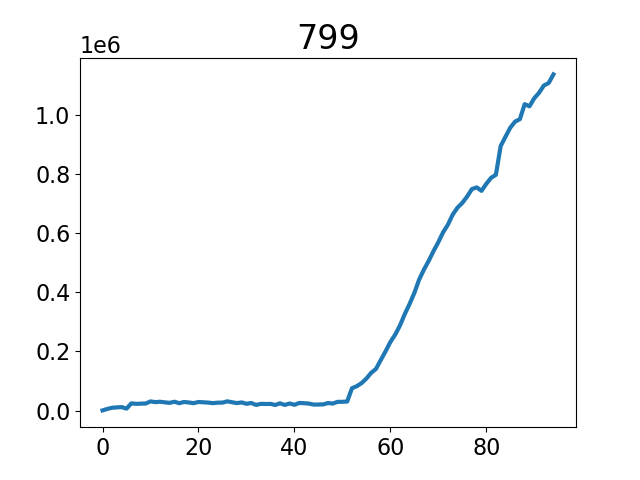

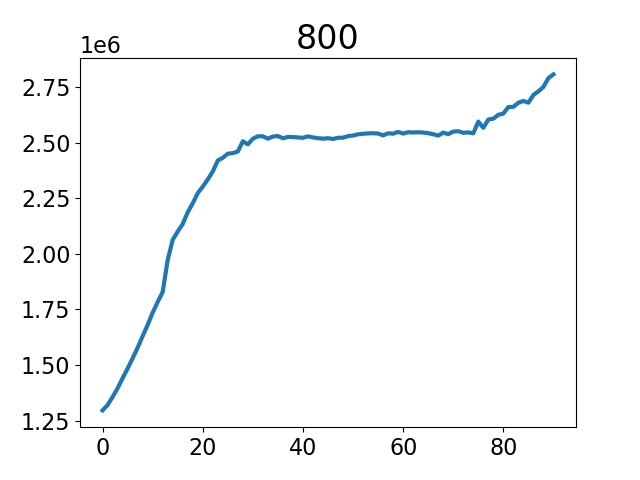

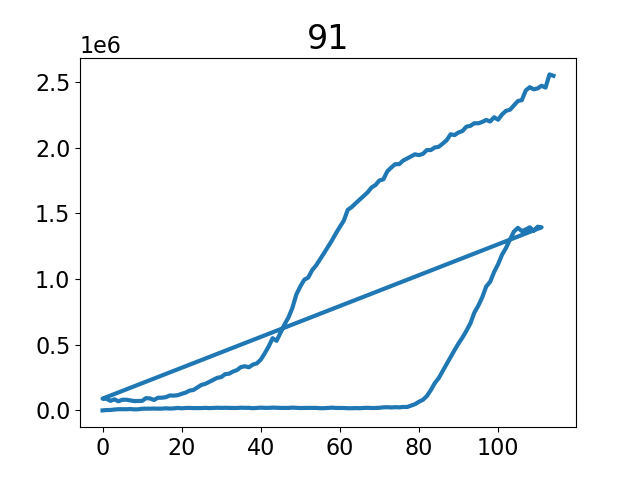

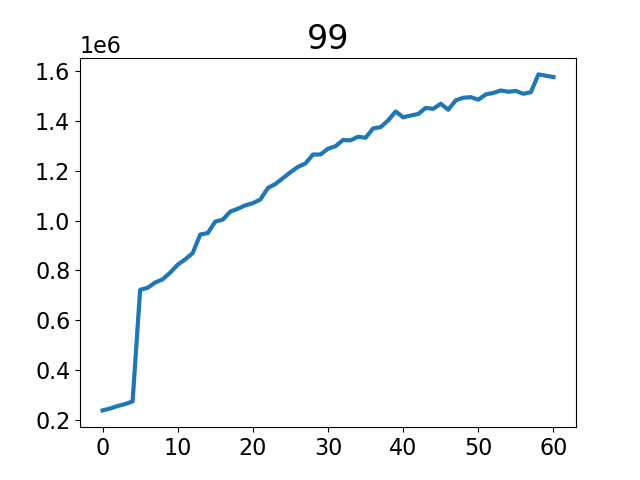

In [6]:
plate_select = [
    "52_20220707",
    "56_20220701",
    "81_20220704",
    "89_20220705",
    "91_20220708",
    "839_20220325",
    "1076_20220511",
    '84_20220621',
    '877_20220419',
    '938_20220325',
    '941_20220404'] #for spore data
plates = [52,84,941,94,152,102,76,83]
plates = [30,32,33]
plates = [799,800,91, 99]

plt.close("all")
# for plate in plate_select:
for plate in plates:
    fig, ax = plt.subplots()
    # table = time_plate_info.loc[time_plate_info["unique_id"]==int(plate)]
    table = time_plate_info.loc[time_plate_info["Plate"]==plate]
    ax.plot(table['timestep'],table['tot_length_study'])
    ax.set_title(f'{plate}')

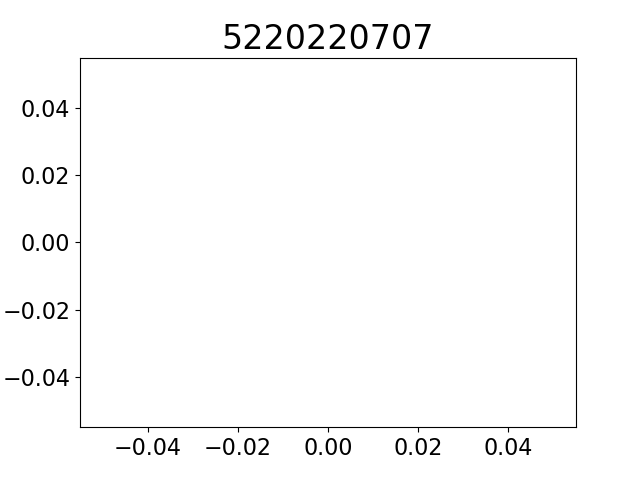

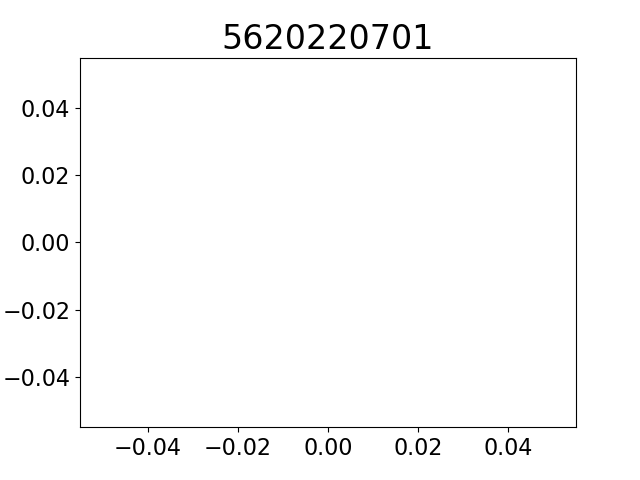

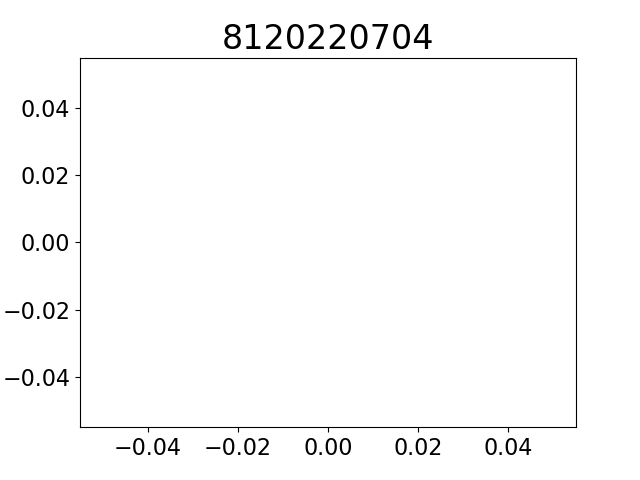

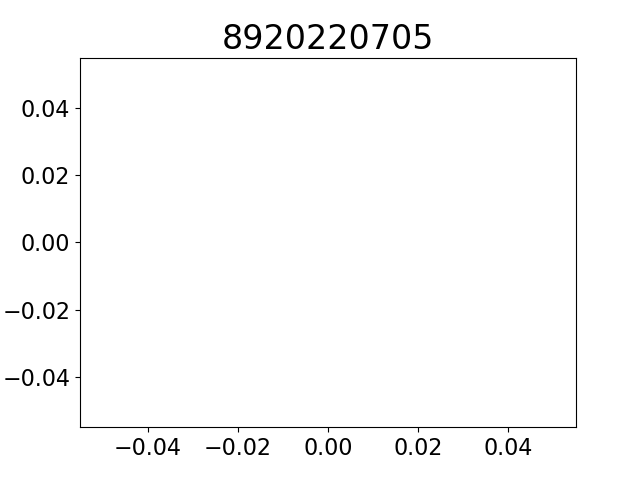

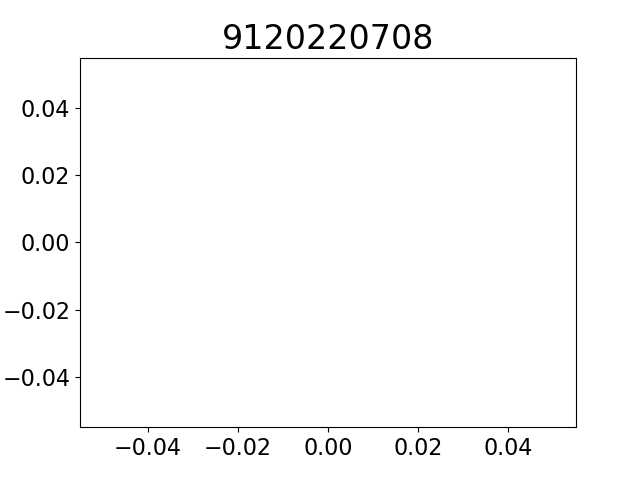

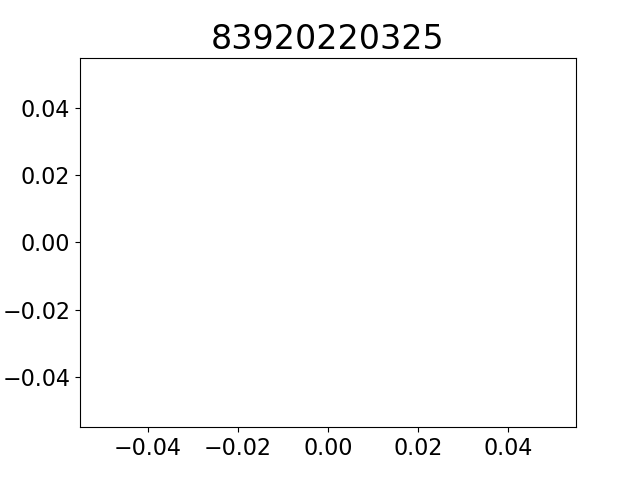

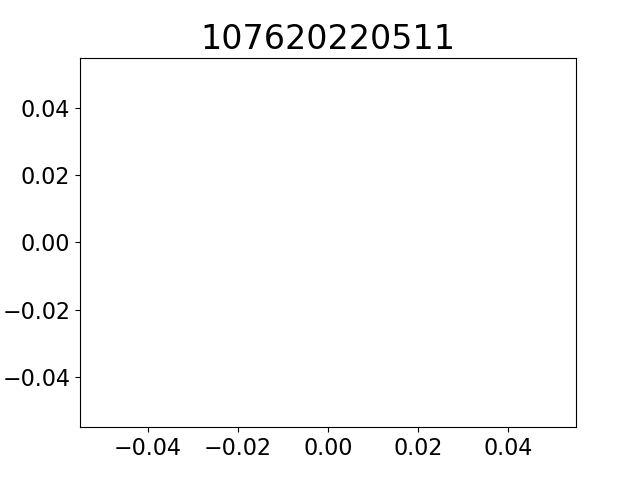

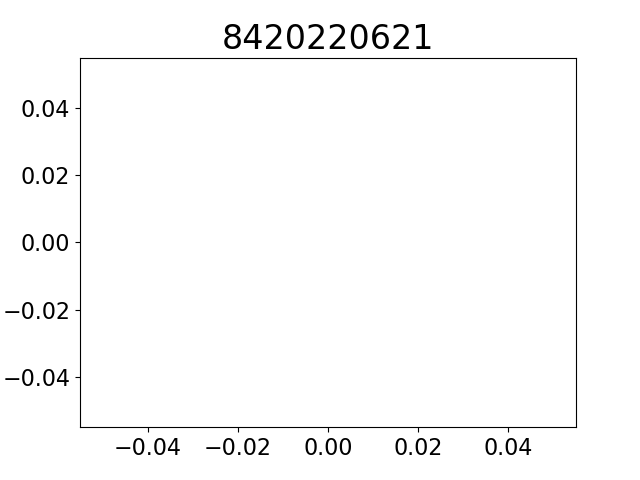

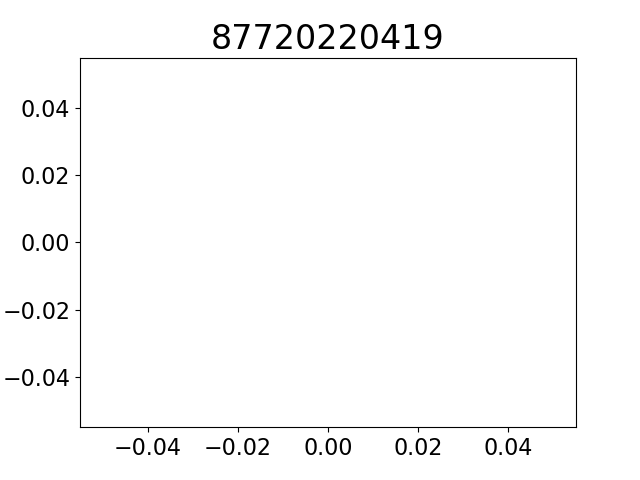

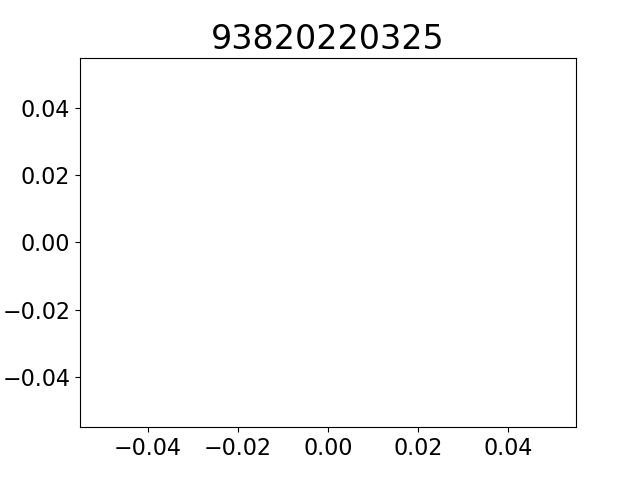

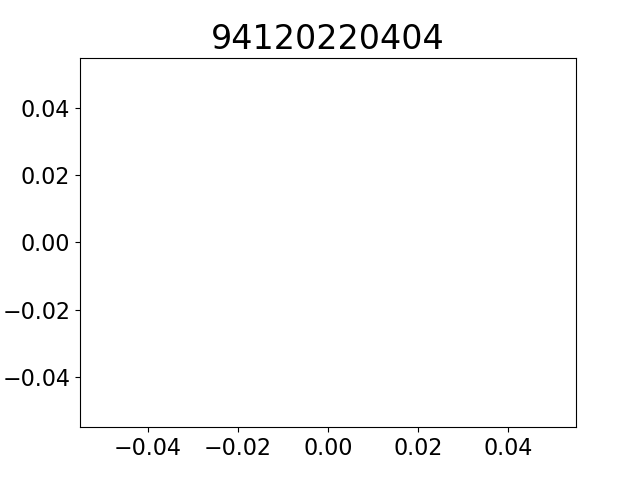

In [7]:
vs = {}
Ks = {}
plate_select = ['127','129','130','1014','1023','1037','1042','52','56','839','938','1076','84','89','91']
plate_select = [
    "52_20220707",
    "56_20220701",
    "81_20220704",
    "89_20220705",
    "91_20220708",
    "839_20220325",
    "1076_20220511",
    '84_20220621',
    '877_20220419',
    '938_20220325',
    '941_20220404'] #for spore data
# plate_select = [32,28,30,1014,1023,1037,1042,52,56,938,1076,84,89,91,127,129,94,152,792,1048,1045,839]
strains = ["'A5'","'A5sp3'"]
# strains = ["'C2'"]

plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N100C'","'001P100N'"]
treatments = ["'001P100N200C'"]

# plate_select = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]
# plate_select = [52,84,938,941,1076,94,152,102,76]

plt.close("all")
for plate in plate_select:
    fig, ax = plt.subplots()
    table = time_plate_info.loc[time_plate_info["Plate"]==plate]
    ax.plot(table['timestep'],table['tot_length_study'])
    ax.set_title(f'{plate}')

In [5]:
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 65,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:60,1048:60,1045:50}
timestep2 = {102:25,83:70,76:15,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}


[0.20426146 0.20074917 1.54726132 3.42791722]
2022-10-21 17:08:22,452-[WARNING]- matplotlib.legend:1236 -> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[ 0.40310731  0.1117527   1.79462703 25.91062704]
2022-10-21 17:08:23,342-[WARNING]- matplotlib.legend:1236 -> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


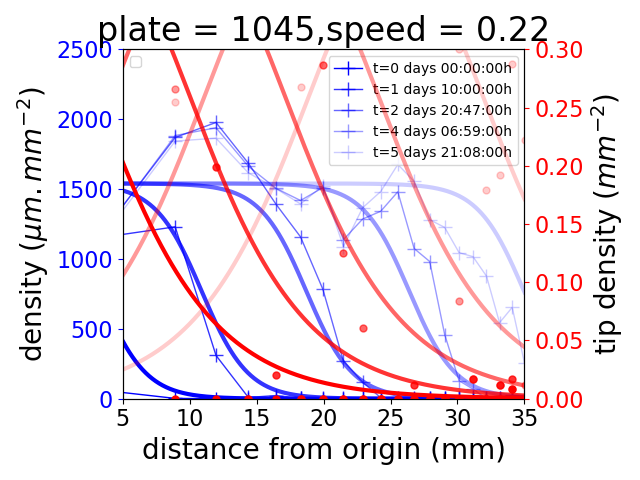

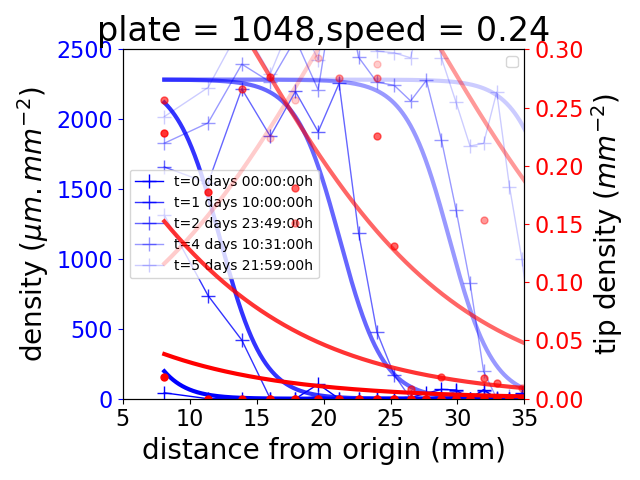

In [6]:
vs = {}
Ks = {}

plate_select = [32,28,30,1014,1023,1037,1042,52,56,938,1076,84,89,91,127,129,94,792,1048,1045]
plate_select = [1014,1023,1037,1042,52,56,938,1076,84,89,91,127,129,94,792,1048,1045]
strains = ["'A5'","'A5sp3'","'C2'"]

plate_select = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
plate_select.remove(1071)
plate_select.remove(1040)
plate_select.remove(128)
plate_select.remove(1024)
plate_select.remove(1027)
plate_select.remove(877)
plate_select.remove(1039)

plate_select.remove(1051)
plate_select.remove(111111)
plate_select = [52,84,1076,94,152,102,76,83]
plate_select = [1045,1048]

# plate_select = [152]
max_indexes = {plate : 20 for plate in plate_select}
max_indexes[102]=15

rsquared = {}
plt.close("all")
for plate in plate_select:
    # try:
    timesteps= range(0,timestep[plate]) 

    popt_f,r_squared_dens,popt_f2,r_squared_tips =get_wave_fit(time_plate_info,plate,timesteps,max_indexes,lamb = -1,C =1000)
    print(popt_f2)
    vs[plate] = popt_f[0]
    Ks[plate] = popt_f[2]
    rsquared[plate] = r_squared_dens
    table = time_plate_info.loc[time_plate_info["Plate"]==plate]
    table = table.replace(np.nan,-1)
    ts = list(table['timestep'])
    table = table.set_index('timestep')
    ts = list(table.index)
    ts.sort()
    dic = {}
    fig, ax = plt.subplots()
    ax.axis([5,35,0,2500])
    ax.set_xlabel('distance from origin (mm)')
    ax.set_ylabel('density ($\mu m.mm^{-2}$)') 
    ax2=ax.twinx()
    ax2.set_ylim((0,0.30))
    ax2.set_ylabel('tip density ($mm^{-2}$)')
    ax.tick_params(axis='y', colors='blue')
    ax2.tick_params(axis='y', colors='red')
    timesteps = range(0,timestep[plate],timestep[plate]//4) 
    for i,t in enumerate(timesteps):
    #     ax.set_yscale("log")

        maxL = np.sqrt(1900)
        X = np.linspace(0,maxL,100)
        incr = 100
        def density(x):
            area = x**2
            index = int(area//incr)
            column = f"ring_density_incr-100_index-{index}"
            return(float(table[column][t]))
        xvalues = np.array([np.sqrt(100*i) for i in range(max_indexes[plate])])
        yvalues = [density(x) for x in xvalues]
        xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues)])
        dic[t] = {}
        dic[t]['distance_origin'] = xvalues
        dic[t]['ring_density'] = yvalues
        xvalues = np.array(xvalues)
        yvalues = np.array(yvalues) 
    #     f = interp1d(xvalues, yvalues)
    #     Y = f(X) 
        X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
        Y = yvalues
        ax.plot(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,
                marker = "+",color="blue",label=f't={table["time_since_begin"][t]}h',
               alpha = (len(timesteps)-i)/len(timesteps),linewidth=1)
        xs = np.linspace(np.min(X),np.max(X),1000)
        ts = [table['time_since_begin_h'][t] for x in xs]
        xt = np.array((xs,ts))
        ax.plot(xs,wave(xt,*popt_f),alpha = (len(timesteps)-i)/len(timesteps),color='blue')
        def density(x):
            area = x**2
            index = int(area//incr)
            column = f"ring_active_tips_density_incr-100_index-{index}"
            return(float(table[column][t]))
        xvalues = np.array([np.sqrt(100*i) for i in range(max_indexes[plate])])
        yvalues = [density(x) for x in xvalues]
        xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues)])
        dic[t]['tip_density'] = yvalues
        xvalues = np.array(xvalues)
        yvalues = np.array(yvalues) 
    #     f = interp1d(xvalues, yvalues)
    #     Y = f(X)  
        X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
        Y = yvalues
        ax2.scatter(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,marker = ".",color="red",
               alpha = (len(timesteps)-i)/len(timesteps))
        xs = np.linspace(np.min(X),np.max(X),1000)
        ts = [table['time_since_begin_h'][t] for x in xs]
        xt = np.array((xs,ts))
        ax2.plot(xs,dwave(xt,*popt_f2),alpha = (len(timesteps)-i)/len(timesteps),color='red')
        # ax.set_title(f'speed = {round(popt_f[0],2)}, density_sat = {round(popt_f[2])}')
        ax.set_title(f'plate = {plate},speed = {round(popt_f[0],2)}')

        right = 0.90
        top = 0.90
        fontsize = 10
    #     text = ax.text(
    #     right,
    #     top,
    #     f"plate {plate}; time = {int(table['time_since_begin'][t])}h",
    #     horizontalalignment="right",
    #     verticalalignment="bottom",
    #     transform=ax.transAxes,
    #     color="black",
    #     fontsize = fontsize,
    # )
    ax.legend()
    ax2.legend()
    plt.tight_layout()
    plt.savefig(f'waves/wave_plate_{plate}')
    # # except:
    #     print('except')
    #     continue

In [12]:
colors = ["black","black","blue","black","yellow","orange","yellow","red"]
treatments = set()
for plate in plate_select:
    treatments.add(time_plate_info.loc[time_plate_info["Plate"]==plate].iloc[0]['strain']+time_plate_info.loc[time_plate_info["Plate"]==plate].iloc[0]['medium'])
treatments = list(treatments)
treatments.sort()
def mapping(plate):
    return(colors[treatments.index(time_plate_info.loc[time_plate_info["Plate"]==plate].iloc[0]['strain']+time_plate_info.loc[time_plate_info["Plate"]==plate].iloc[0]['medium'])])

In [13]:
treatments

["'A5''001P100N'",
 "'A5''001P100N100C'",
 "'A5''001P100N200C'",
 "'A5sp3''001P100N100C'",
 "'C2''001P100N100C'",
 "'C2''001P100N200C'"]

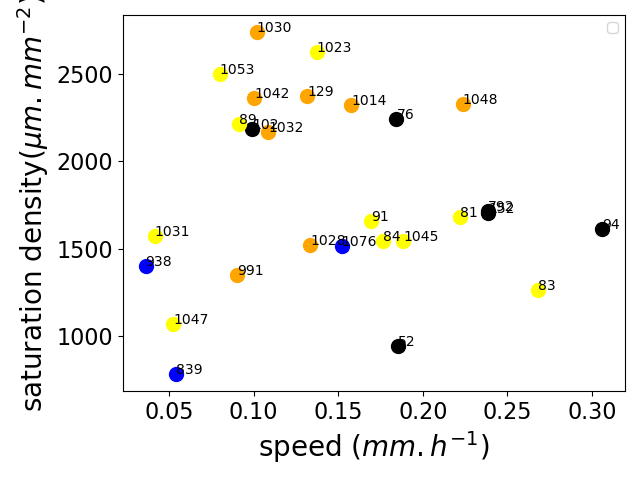

In [15]:
fig,ax = plt.subplots()
for plate in plate_select:
    if plate in rsquared.keys():
        if rsquared[plate] >=0.5:
            ax.scatter(vs[plate],Ks[plate],color=mapping(plate))
            ax.text(vs[plate],Ks[plate],plate)
legends = []
# for i,treatment in enumerate(treatments):
#     legends.append(mpatches.Patch(color=colors[i], label=treatment))
ax.legend(handles=legends)
ax.set_xlabel('speed ($mm .h^{-1}$)')
ax.set_ylabel('saturation density($\mu m.mm^{-2}$)')
plt.tight_layout()


In [10]:
treatments

["'A5''001P100N100C'",
 "'A5sp3''001P100N100C'",
 "'A5''001P100N200C'",
 "'C2''001P100N100C'",
 "'C2''001P100N200C'",
 "'A5''001P100N'"]

NameError: name 'colors' is not defined

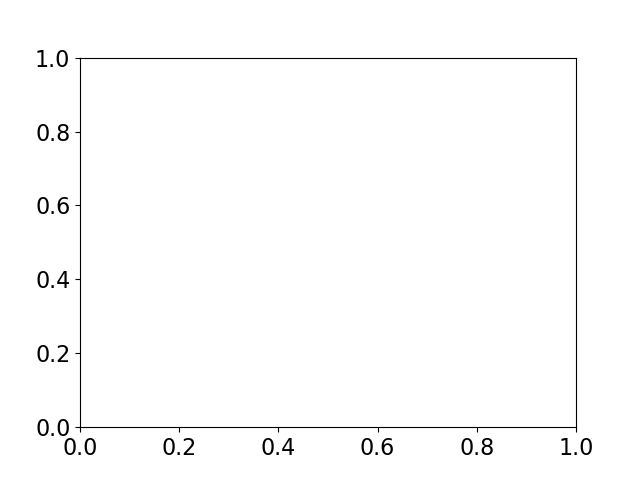

In [5]:
plt.close('all')
fig, ax = plt.subplots()

# ax2 = ax.twinx()
plate_select= [int(plate) for plate in plate_select]

for plate in plate_select:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []


    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=600]['time_since_begin_h'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin_h']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate,color=colors[plate])
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    # ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed",color=colors[plate])
# ax2.set_color('red')
ax.set_xlim((-30,30))
# ax2.set_ylim((0,0.1))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# plt.legend()
plt.tight_layout()
plt.savefig("replicate.svg")


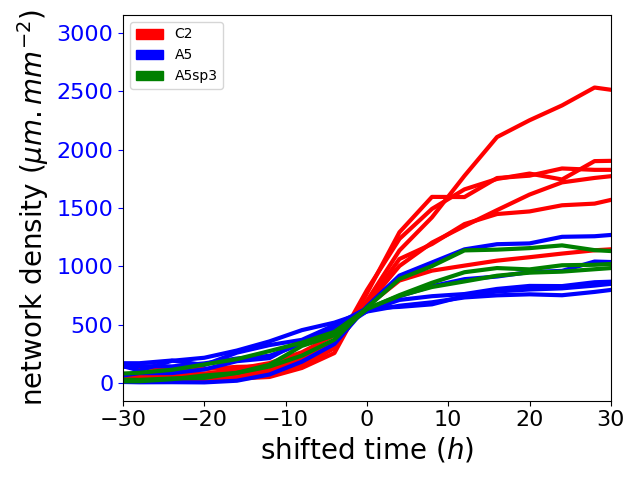

In [26]:
plt.close('all')
fig, ax = plt.subplots()

# ax2 = ax.twinx()
plate_select= [int(plate) for plate in plate_select]

for plate in plate_select:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []


    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=600]['time_since_begin_h'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin_h']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate,color=colors[plate])
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    # ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed",color=colors[plate])
# ax2.set_color('red')
ax.set_xlim((-30,30))
# ax2.set_ylim((0,0.1))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# plt.legend()
plt.tight_layout()
red_patch = mpatches.Patch(color='red', label='C2')
blue_patch = mpatches.Patch(color='blue', label='A5')
green_patch = mpatches.Patch(color='green', label='A5sp3')

ax.legend(handles=[red_patch,blue_patch,green_patch])
plt.savefig("replicate.svg")



C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: array([[0.        , 0.24705882, 0.87647059, 1.        ],
       [0.        , 0.24705882, 0.87647059, 1.        ]]) is not a valid value for color

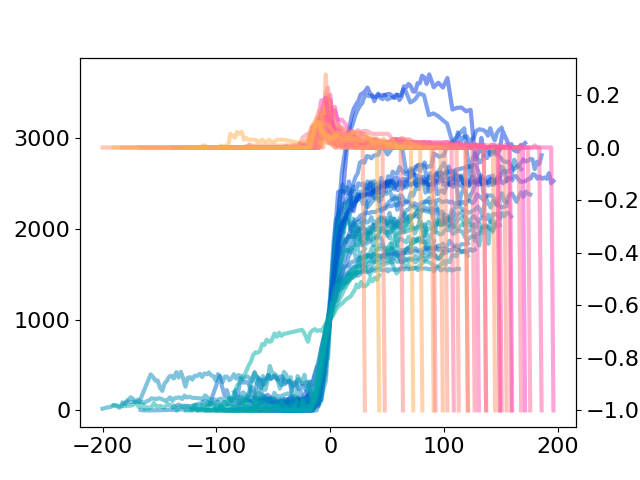

In [6]:
plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()
maxi = 12
max_area = 50
Cs = []
lambs = [] 
indexes = []
plates = []
plate_select= [int(plate) for plate in plate_select]
for plate in plate_select:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()    
    ts = []
    ys = []
    ys2 = []
    for index in range(1,maxi):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=1000]['time_since_begin_h'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin_h']-start
            area = np.sqrt(table["area_sep_comp"][0]+100*index)
            selection_fit = table
            popt0, pcov = curve_fit(S, selection_fit[f'time_since_begin_{index}'],selection_fit[column] ,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[1,1,0])
            lamb,C,t0 = list(popt0)
            Cs.append(C)
            lambs.append(lamb)
            indexes.append(index)
            plates.append(plate)
            ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.5,color=cmap2(area/max_area))
            ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.5,color=cmap1(area/max_area))

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax2.set_ylim((0,0.2))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [44]:
table

,num_trunks,area,area_sep_comp,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,...,ring_active_tips_density_incr-100_index-19,time_since_begin,time_since_begin_h,folder,unique_id,datetime,PrincePos,root,strain,medium
timestep,,,,,,,,,,,,,,,,,,,,,


C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

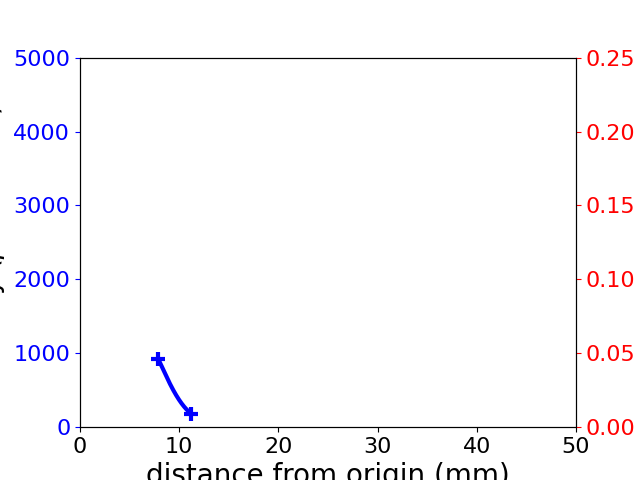

In [47]:
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate]
table = table.replace(np.nan,-1)
ts = list(table['timestep'])
table = table.set_index('timestep')
ts.sort()
dic = {}
fig, ax = plt.subplots()
ax.axis([0,50,0,5000])
ax.set_xlabel('distance from origin (mm)')
ax.set_ylabel('density ($\mu m.mm^{-2}$)') 
ax2=ax.twinx()
ax2.set_ylim((0,0.25))
ax2.set_ylabel('tip density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
timesteps = [20,40,60,80]
for i,t in enumerate(timesteps):
#     ax.set_yscale("log")

    maxL = np.sqrt(1900)
    X = np.linspace(0,maxL,100)
    incr = 100
    def density(x):
        area = x**2
        index = int(area//incr)
        column = f"ring_density_incr-100_index-{index}"
        return(float(table[column][t]))
    xvalues = np.array([np.sqrt(100*i) for i in range(20)])
    yvalues = [density(x) for x in xvalues]
    xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues) if y!=0])
    dic[t] = {}
    dic[t]['distance_origin'] = xvalues
    dic[t]['ring_density'] = yvalues
    xvalues = np.array(xvalues)
    yvalues = np.array(yvalues) 
#     f = interp1d(xvalues, yvalues)
#     Y = f(X) 
    X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
    Y = yvalues
    # print(X,Y)
    popt0, pcov = curve_fit(S, X,Y,bounds = ([-np.inf,0,-np.inf],[0,np.inf,np.inf]),p0=[-1,1,0])
    lamb,C,t0 = list(popt0)
    ax.scatter(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,
            marker = "+",color="blue",label=f't={table["time_since_begin"][t]}',
           alpha = (len(timesteps)-i)/len(timesteps))
    ts = np.linspace(np.min(X),np.max(X),1000)
    ax.plot(ts,S(ts,lamb,C,t0),alpha = (len(timesteps)-i)/len(timesteps),color='blue')
    def density(x):
        area = x**2
        index = int(area//incr)
        column = f"ring_active_tips_density_incr-100_index-{index}"
        return(float(table[column][t]))
    xvalues = np.array([np.sqrt(100*i) for i in range(20)])
    yvalues = [density(x) for x in xvalues]
    xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues)])
    dic[t]['tip_density'] = yvalues
    xvalues = np.array(xvalues)
    yvalues = np.array(yvalues) 
#     f = interp1d(xvalues, yvalues)
#     Y = f(X)  
    X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
    Y = yvalues
    popt0, pcov = curve_fit(dS, X,Y,bounds = ([-np.inf,0,-np.inf],[0,np.inf,np.inf]),p0=[lamb,1,t0])
    lamb,C,t0 = list(popt0)
    ax2.scatter(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,marker = "+",color="red",
           alpha = (len(timesteps)-i)/len(timesteps))
    ts = np.linspace(np.min(X),np.max(X),1000)
    ax2.plot(ts,dS(ts,lamb,C,t0),alpha = (len(timesteps)-i)/len(timesteps),color='red')

    right = 0.90
    top = 0.90
    fontsize = 10
#     text = ax.text(
#     right,
#     top,
#     f"plate {plate}; time = {int(table['time_since_begin'][t])}h",
#     horizontalalignment="right",
#     verticalalignment="bottom",
#     transform=ax.transAxes,
#     color="black",
#     fontsize = fontsize,
# )
ax.legend()
ax2.legend()
plt.tight_layout()

save = f'Figure/im{t}.svg'
plt.savefig(save)
# plt.close(fig)
#     break
# img_array = []
# for t in ts:
#     img = imageio.imread(f'Figure/im{t}.png')
#     img_array.append(img)
    
# path_movie = f'movies/{plate}_full.mp4'
# imageio.mimsave(path_movie, img_array)

2022-09-12 21:56:17,507-[WARNING]- matplotlib.legend:1217 -> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


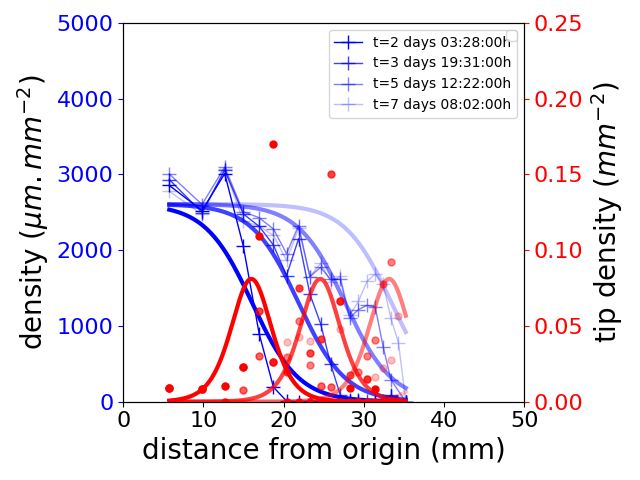

In [33]:
plate = 1023
popt_f,r_squared_dens,popt_f2,r_squared_tips = get_wave_fit(time_plate_info,plate,range(10,80),lamb = -1,C =0.2)
table = time_plate_info.loc[time_plate_info["Plate"]==plate]
table = table.replace(np.nan,-1)
ts = list(table['timestep'])
table = table.set_index('timestep')
ts = list(table.index)
ts.sort()
dic = {}
fig, ax = plt.subplots()
ax.axis([0,50,0,5000])
ax.set_xlabel('distance from origin (mm)')
ax.set_ylabel('density ($\mu m.mm^{-2}$)') 
ax2=ax.twinx()
ax2.set_ylim((0,0.25))
ax2.set_ylabel('tip density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
timesteps = [20,40,60,80]
for i,t in enumerate(timesteps):
#     ax.set_yscale("log")

    maxL = np.sqrt(1900)
    X = np.linspace(0,maxL,100)
    incr = 100
    def density(x):
        area = x**2
        index = int(area//incr)
        column = f"ring_density_incr-100_index-{index}"
        return(float(table[column][t]))
    xvalues = np.array([np.sqrt(100*i) for i in range(20)])
    yvalues = [density(x) for x in xvalues]
    xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues) if y!=0])
    dic[t] = {}
    dic[t]['distance_origin'] = xvalues
    dic[t]['ring_density'] = yvalues
    xvalues = np.array(xvalues)
    yvalues = np.array(yvalues) 
#     f = interp1d(xvalues, yvalues)
#     Y = f(X) 
    X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
    Y = yvalues
    ax.plot(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,
            marker = "+",color="blue",label=f't={table["time_since_begin"][t]}h',
           alpha = (len(timesteps)-i)/len(timesteps),linewidth=1)
    xs = np.linspace(np.min(X),np.max(X),1000)
    ts = [t for x in xs]
    xt = np.array((xs,ts))
    ax.plot(xs,wave(xt,*popt_f),alpha = (len(timesteps)-i)/len(timesteps),color='blue')
    def density(x):
        area = x**2
        index = int(area//incr)
        column = f"ring_active_tips_density_incr-100_index-{index}"
        return(float(table[column][t]))
    xvalues = np.array([np.sqrt(100*i) for i in range(20)])
    yvalues = [density(x) for x in xvalues]
    xvalues,yvalues = zip(*[(x,y) for x,y in zip(xvalues,yvalues)])
    dic[t]['tip_density'] = yvalues
    xvalues = np.array(xvalues)
    yvalues = np.array(yvalues) 
#     f = interp1d(xvalues, yvalues)
#     Y = f(X)  
    X = np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2))
    Y = yvalues
    ax2.scatter(np.sqrt((xvalues**2+table["area_sep_comp"][0])/(np.pi/2)), yvalues,marker = ".",color="red",
           alpha = (len(timesteps)-i)/len(timesteps))
    xs = np.linspace(np.min(X),np.max(X),1000)
    ts = [t for x in xs]
    xt = np.array((xs,ts))
    ax2.plot(xs,dwave(xt,*popt_f2),alpha = (len(timesteps)-i)/len(timesteps),color='red')

    right = 0.90
    top = 0.90
    fontsize = 10
#     text = ax.text(
#     right,
#     top,
#     f"plate {plate}; time = {int(table['time_since_begin'][t])}h",
#     horizontalalignment="right",
#     verticalalignment="bottom",
#     transform=ax.transAxes,
#     color="black",
#     fontsize = fontsize,
# )
ax.legend()
ax2.legend()
plt.tight_layout()
plt.savefig(f'waves/wave_plate_{plate}')

In [32]:
table[f"ring_density_incr-100_index-{10}"][20]

KeyError: 20